Import Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df = pd.read_csv("C:\\IPSD\\DataCO2.csv")
df

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


Data Prepocessing

In [19]:
df.head() #menampilkan 5 data teratas

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [20]:
df.info() #informasi dari data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Bobot   36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [21]:
df.isna().sum() #mengecek missing value

Nama      0
Model     0
Volume    0
Bobot     0
CO2       0
dtype: int64

In [22]:
df.duplicated().sum() #Mengecek nialai duplikat

0

Mengecek Outlier

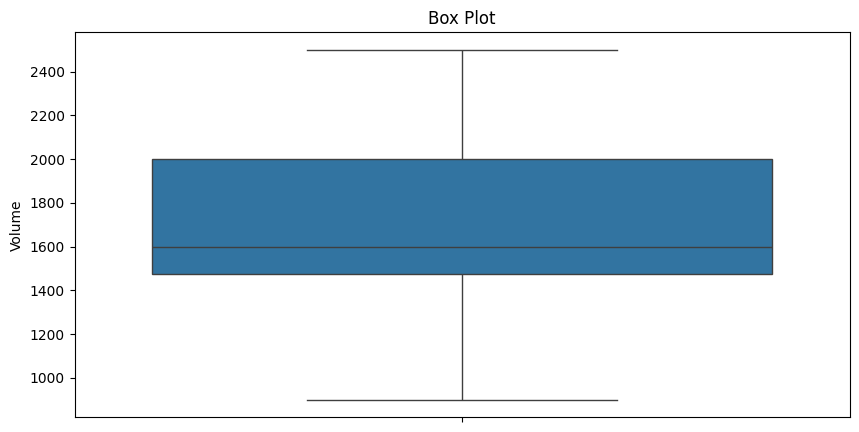

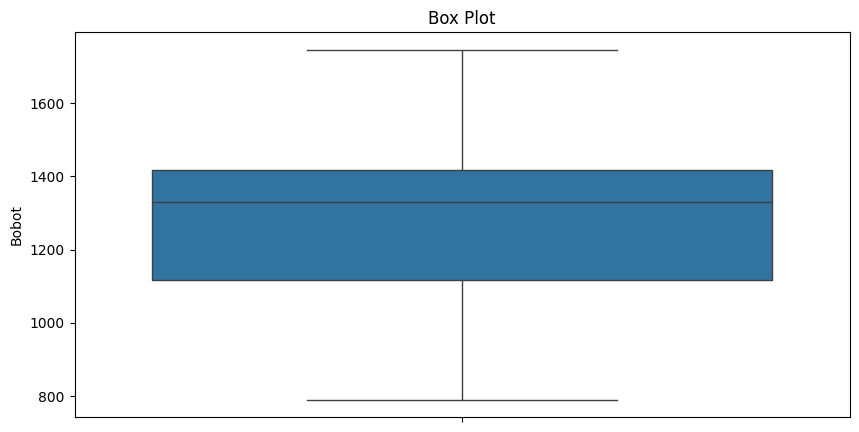

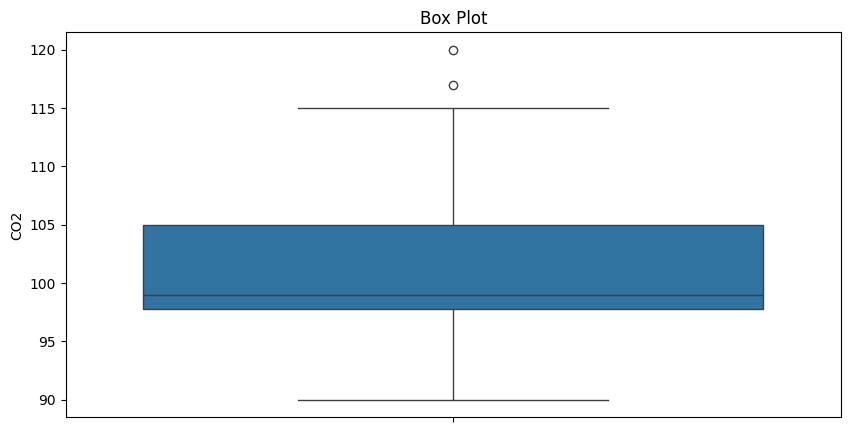

In [23]:
for i in ['Volume',	'Bobot',	'CO2']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[i])
    plt.title('Box Plot')
    plt.show()

Exploratory Data

In [24]:
df.describe() #analisa deskriptif

,Volume,Bobot,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


Bar Chart untuk 5 mobil dengan CO2 terendah

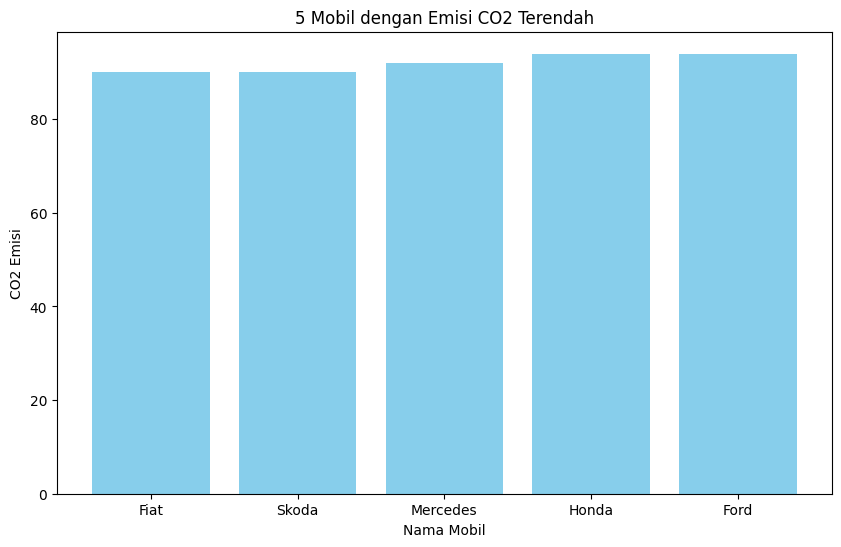

In [25]:
# Mengambil 5 mobil dengan CO2 terendah
top_5_cars = df.nsmallest(5, 'CO2')

plt.figure(figsize=(10, 6))
plt.bar(top_5_cars['Nama'], top_5_cars['CO2'], color='skyblue')
plt.xlabel('Nama Mobil')
plt.ylabel('CO2 Emisi')
plt.title('5 Mobil dengan Emisi CO2 Terendah')
plt.show()


Histogram untuk volume mesin mobil

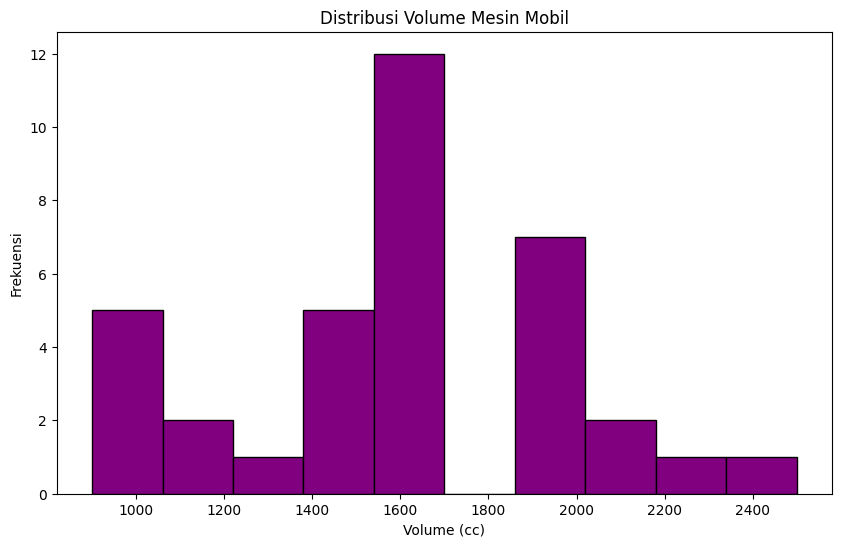

In [26]:
# Membuat histogram untuk Volume mesin mobil
plt.figure(figsize=(10, 6))
plt.hist(df['Volume'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Volume (cc)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Volume Mesin Mobil')
plt.show()



In [27]:
# Menampilkan kolom numerik saja
numerical_columns = df.select_dtypes(include=['number']).columns
print("Kolom numerik dalam DataFrame:", numerical_columns)


Kolom numerik dalam DataFrame: Index(['Volume', 'Bobot', 'CO2'], dtype='object')


Korelasi Matrix

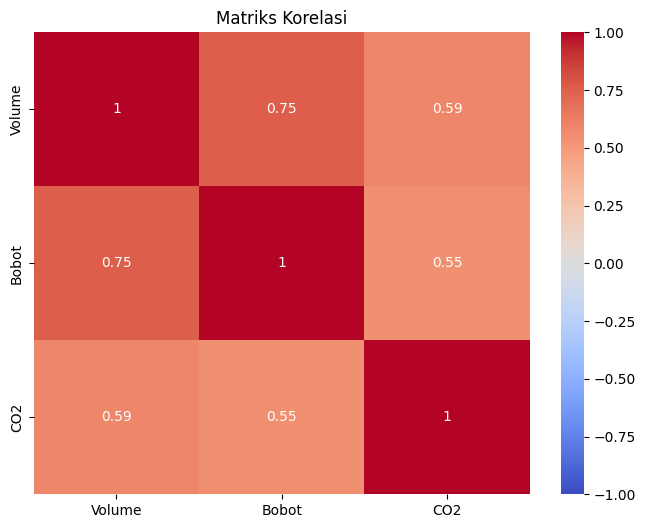

In [28]:
# Memilih hanya kolom numerik
numerical_df = df.select_dtypes(include='number')

# Menghitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Menampilkan matriks korelasi dalam bentuk heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()


Target dan fitur

In [29]:
# Pisahkan fitur (X) dan target (y)
X = df[['Volume', 'Bobot']]  # Fitur
y = df['CO2']  # Target

Bagi data latih dan uji 

In [30]:
#membagi menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membuat model


In [31]:
#Membuat model regresi linear
model_linear = LinearRegression()

 #Melatih model
model_linear.fit(X_train, y_train)

 #Prediksi pada data uji
y_pred_test = model_linear.predict(X_test)

Evaluasi

In [32]:
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
rmse = np.sqrt(mse)   #Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_test)  #Mean Absolute Error
r2 = r2_score(y_test, y_pred_test)   #R-squared

 #Output hasil
print("Mean Squared Error (MSE) pada data uji:", mse)
print("Root Mean Squared Error (RMSE) pada data uji:", rmse)
print("Mean Absolute Error (MAE) pada data uji:", mae)
print("R-squared (R2) pada data uji:", r2)
print("Koefisien (slope):", model_linear.coef_[0])
print("Intercept:", model_linear.intercept_)


Mean Squared Error (MSE) pada data uji: 58.07928583657771
Root Mean Squared Error (RMSE) pada data uji: 7.620976698335832
Mean Absolute Error (MAE) pada data uji: 6.335639624274503
R-squared (R2) pada data uji: 0.32941109624012743
Koefisien (slope): 0.004287414249075688
Intercept: 84.21502006695282
